## Target preparation and initial analysis

#### imports and loading of data

In [34]:
import scipy.io
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pyedflib import highlevel

#load patient

signals, signal_headers, header = highlevel.read_edf('eeg5.edf')

# check electrodes (do we want/need them all?) 
names_ele = [signal_headers[iele]['label'] for iele in range(signals.shape[0])]


    
# load annotation file
annt = scipy.io.loadmat('annotations_2017.mat')

#### Three diagnosis per datapoint per patient

In [35]:
#fucntion giving the dataframe containing the three diagnosis of neurologist per datapoint for patient number n
def diagnosis(n):
    patient_A=annt["annotat_new"][0][n-1][0]
    patient_B=annt["annotat_new"][0][n-1][1]
    patient_C=annt["annotat_new"][0][n-1][2]
    
    #converting seconds to datapoints

    patient_A=patient_A.tolist()
    patient_B=patient_B.tolist()
    patient_C=patient_C.tolist()
    
    patient_A_dtp=[]
    patient_B_dtp=[]
    patient_C_dtp=[]  
    for elem in patient_A:
        for i in range(256):
            patient_A_dtp.append(elem) 
    for elem in patient_B:
        for i in range(256):
            patient_B_dtp.append(elem)
        
    for elem in patient_C:
        for i in range(256):
            patient_C_dtp.append(elem)
            
    target_=pd.DataFrame({"Diagnosis A":patient_A_dtp,"Diagnosis B":patient_B_dtp,"Diagnosis C":patient_C_dtp})
    
    return target_  
    


In [36]:
diagnosis(5)

,Diagnosis A,Diagnosis B,Diagnosis C
0,1,1,1
1,1,1,1
2,1,1,1
3,1,1,1
4,1,1,1
...,...,...,...
983291,0,0,1
983292,0,0,1
983293,0,0,1
983294,0,0,1


#### Signals per patient

In [37]:
def ecg_formated(signals):
    data_signals = signals.T 
    data_signals = pd.DataFrame(data_signals) # create a pandas dataframe
    
    data_signals.columns = names_ele # rename columns
    
    return data_signals

In [38]:
ecg_patient_5 = ecg_formated(signals)
diagnosis_patient_5 = diagnosis(5)

data_patient_5 = pd.merge(left=ecg_patient_5, right=diagnosis_patient_5, how='left', left_index=True, right_index=True)
data_patient_5

,EEG Fp1-Ref,EEG Fp2-Ref,EEG F7-Ref,EEG F3-Ref,EEG Fz-Ref,EEG F4-Ref,EEG F8-Ref,EEG T3-Ref,EEG C3-Ref,EEG Cz-Ref,...,EEG Pz-Ref,EEG P4-Ref,EEG T6-Ref,EEG O1-Ref,EEG O2-Ref,ECG EKG,Resp Effort,Diagnosis A,Diagnosis B,Diagnosis C
0,-1.217202,18.161445,26.858948,13.736399,0.308676,-8.694003,20.145086,8.395827,-16.018216,10.684644,...,-7.625889,16.940743,15.262277,-16.781155,-8.846591,8.853591,0.308676,1,1,1
1,-3.048255,42.270313,54.629922,22.586490,0.308676,-16.628567,40.744435,20.908025,-32.192520,20.297674,...,-13.729399,34.335749,30.978818,-31.124405,-15.560453,21.365788,1.681965,1,1,1
2,-8.236240,42.575488,49.594526,10.837232,-1.217202,-11.745758,37.845267,19.687322,-29.293352,18.008857,...,-12.203522,33.420222,30.215879,-26.089009,-10.525056,12.057934,3.970782,1,1,1
3,-3.506019,35.251275,51.578167,19.839910,-1.827553,-12.966461,40.286672,19.229559,-32.650283,18.466620,...,-12.661285,34.793512,32.199520,-28.072650,-11.593171,1.224202,4.275958,1,1,1
4,3.360431,31.894344,49.747113,19.076971,-2.743080,-13.881987,36.624565,9.158766,-31.429581,17.551094,...,-12.050934,34.183161,30.978818,-27.920062,-12.050934,5.344072,4.275958,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983291,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,...,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0,0,1
983292,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,...,0.003500,0.003500,0.003500,0.003500,0.003500,0.613851,0.003500,0,0,1
983293,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,...,0.003500,0.003500,0.003500,0.003500,0.003500,0.766439,0.003500,0,0,1
983294,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,...,0.003500,0.003500,0.003500,0.003500,0.003500,-0.759439,0.003500,0,0,1


### Data summary

In [39]:
size_tuple=data_patient_5.shape
size_tuple
number_ele=size_tuple[1]-3
duration=size_tuple[0]/256
print(f"The number of electrodes is {number_ele}")
print(f"The duration of the recording is {duration} seconds")


The number of electrodes is 21
The duration of the recording is 3841.0 seconds


In [40]:
data_patient_5['is_seizure_A'] = data_patient_5["Diagnosis A"].groupby((data_patient_5["Diagnosis A"] != data_patient_5["Diagnosis A"].shift()).cumsum()).transform('size') * data_patient_5["Diagnosis A"]
threshold = 2560
data_patient_5['is_seizure_A'] = (data_patient_5.is_seizure_A > threshold).astype(int)
data_patient_5['is_seizure_B'] = data_patient_5["Diagnosis B"].groupby((data_patient_5["Diagnosis B"] != data_patient_5["Diagnosis B"].shift()).cumsum()).transform('size') * data_patient_5["Diagnosis B"]
threshold = 2560
data_patient_5['is_seizure_B'] = (data_patient_5.is_seizure_B > threshold).astype(int)
data_patient_5['is_seizure_C'] = data_patient_5["Diagnosis C"].groupby((data_patient_5["Diagnosis C"] != data_patient_5["Diagnosis C"].shift()).cumsum()).transform('size') * data_patient_5["Diagnosis C"]
threshold = 2560
data_patient_5['is_seizure_C'] = (data_patient_5.is_seizure_C > threshold).astype(int)


In [41]:
data_patient_5

,EEG Fp1-Ref,EEG Fp2-Ref,EEG F7-Ref,EEG F3-Ref,EEG Fz-Ref,EEG F4-Ref,EEG F8-Ref,EEG T3-Ref,EEG C3-Ref,EEG Cz-Ref,...,EEG O1-Ref,EEG O2-Ref,ECG EKG,Resp Effort,Diagnosis A,Diagnosis B,Diagnosis C,is_seizure_A,is_seizure_B,is_seizure_C
0,-1.217202,18.161445,26.858948,13.736399,0.308676,-8.694003,20.145086,8.395827,-16.018216,10.684644,...,-16.781155,-8.846591,8.853591,0.308676,1,1,1,1,1,1
1,-3.048255,42.270313,54.629922,22.586490,0.308676,-16.628567,40.744435,20.908025,-32.192520,20.297674,...,-31.124405,-15.560453,21.365788,1.681965,1,1,1,1,1,1
2,-8.236240,42.575488,49.594526,10.837232,-1.217202,-11.745758,37.845267,19.687322,-29.293352,18.008857,...,-26.089009,-10.525056,12.057934,3.970782,1,1,1,1,1,1
3,-3.506019,35.251275,51.578167,19.839910,-1.827553,-12.966461,40.286672,19.229559,-32.650283,18.466620,...,-28.072650,-11.593171,1.224202,4.275958,1,1,1,1,1,1
4,3.360431,31.894344,49.747113,19.076971,-2.743080,-13.881987,36.624565,9.158766,-31.429581,17.551094,...,-27.920062,-12.050934,5.344072,4.275958,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983291,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,...,0.003500,0.003500,0.003500,0.003500,0,0,1,0,0,1
983292,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,...,0.003500,0.003500,0.613851,0.003500,0,0,1,0,0,1
983293,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,...,0.003500,0.003500,0.766439,0.003500,0,0,1,0,0,1
983294,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,...,0.003500,0.003500,-0.759439,0.003500,0,0,1,0,0,1


In [30]:
is_seizure_A=list(data_patient_5["is_seizure_A"])
from itertools import groupby


def groups(l):
    
    return [sum(g) for i, g in groupby(l) if i == 1]

#>>> groups([0,1,0,0,0])
#[1]
#>>> groups([0,0,1,1,0])
#[2]
#>>> groups([1,1,0,1,1])
#[2, 2]

groups(is_seizure_A)

[32512, 161536, 136704, 218368, 302080]

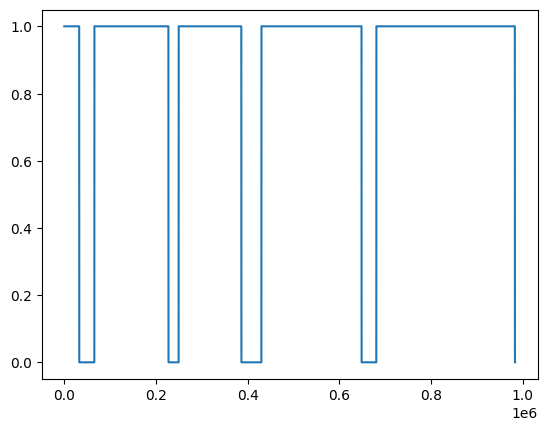

In [31]:
plt.plot(is_seizure_A)

In [46]:
from itertools import groupby
#returning a tuple with the number of seizures per patient and per diagnosis, considering that each seizure must last at least 10 seconds to be considered as a seizure
def number_total_seizure(df):
    is_seizure_A=list(df["is_seizure_A"])
    is_seizure_B=list(df["is_seizure_B"])
    is_seizure_C=list(df["is_seizure_C"])
    list_A=[sum(g) for i, g in groupby(is_seizure_A) if i == 1]
    list_B=[sum(g) for i, g in groupby(is_seizure_B) if i == 1]
    list_C=[sum(g) for i, g in groupby(is_seizure_C) if i == 1]
    return len(list_A),len(list_B),len(list_C)

In [47]:
#returning the list of the duration of each seazure for each patient and each diagnosis
def duration_total_seizure(df):
    is_seizure_A=list(df["is_seizure_A"])
    is_seizure_B=list(df["is_seizure_B"])
    is_seizure_C=list(df["is_seizure_C"])
    dur_list_A=[]
    dur_list_B=[]
    dur_list_C=[]
    list_A=[sum(g) for i, g in groupby(is_seizure_A) if i == 1]
    list_B=[sum(g) for i, g in groupby(is_seizure_B) if i == 1]
    list_C=[sum(g) for i, g in groupby(is_seizure_C) if i == 1]
    for elem in list_A:
        dur_list_A.append(elem/2560)
    for elem in list_B:
        dur_list_B.append(elem/2560)
    for elem in list_C:
        dur_list_C.append(elem/2560)
    return dur_list_A,dur_list_B,dur_list_C


In [44]:
number_total_seizure(data_patient_5)

(5, 5, 7)

In [45]:
duration_total_seizure(data_patient_5)

([12.7, 63.1, 53.4, 85.3, 118.0],
 [10.7, 62.1, 45.4, 82.5, 118.2],
 [14.7, 62.0, 45.7, 57.1, 24.5, 41.9, 72.5])